In [125]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.preprocessing as proc
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

os.getcwd()

'/Users/henry.mcgowan/Desktop/Coding'

In [5]:
mnist = fetch_openml(name = 'mnist_784', version = 1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X, y = np.array(mnist['data']), np.array(mnist['target'])

In [22]:
X.shape

(70000, 784)

In [38]:
y = y.astype('int')

In [30]:
instance = X[5].reshape(28, 28)

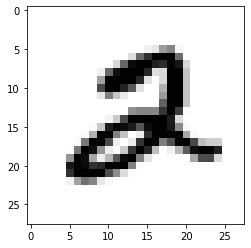

In [33]:
plt.imshow(instance, cmap = 'binary')

In [70]:
# split training and test
X_train, X_test, y_train, y_test = X[0: 60000], X[60000:], y[0: 60000], y[60000:]

In [71]:
y_train_3 = y_train == 3
y_test_3 = y_test == 3

In [72]:
LDA = LinearDiscriminantAnalysis()
RF = RandomForestClassifier()
Ridge = RidgeClassifier()

LDA.fit(X_train, y_train_3)
RF.fit(X_train, y_train_3)
Ridge.fit(X_train, y_train_3)

RidgeClassifier()

In [73]:
LDA_pred = LDA.predict(X_test)
RF_pred = RF.predict(X_test)
Ridge_pred = Ridge.predict(X_test)

In [79]:
print(metrics.accuracy_score(y_test_3, LDA_pred))
print(metrics.accuracy_score(y_test_3, RF_pred))
print(metrics.accuracy_score(y_test_3, Ridge_pred))

0.9655
0.9871
0.9602


In [130]:
# Multi-Class Model
models = [LinearDiscriminantAnalysis(), RandomForestClassifier(), RidgeClassifier()]

models_2 = [GradientBoostingClassifier(), KNeighborsClassifier(), ExtraTreesClassifier()]

cross_validation_results = {}
cross_validation_results_round2 = {}

for i in models_2: 
    start = time.time()
    model_instance = i
    folds = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
    cross_validation_results_round2[str(i).removesuffix('()')] = cross_validate(model_instance, X_train, y_train, scoring = 'accuracy',
                                                    cv = folds, return_train_score = True)
    end = time.time()
    print('Finished CV for {model}'.format(model = i) + 'in {runtime}'.format(runtime = round(end - start, 1)) + ' seconds')

# good lesson here - batch gradient descent is SLOW

Finished CV for GradientBoostingClassifier()in 14830.7 seconds
Finished CV for KNeighborsClassifier()in 807.2 seconds
Finished CV for ExtraTreesClassifier()in 151.4 seconds


In [122]:
# first set of models - interesting that LDA and Ridge deteroriated in performance versus binary whereas RF improved
for i in cross_validation_results:
    print('{Model} Test Set Accuracy: '.format(Model = i) + str(round(cross_validation_results[i]['test_score'].mean(), 3)), 
          'Training Set Accuracy: ' + str(round(cross_validation_results[i]['train_score'].mean(), 3)) )

LinearDiscriminantAnalysis Test Set Accuracy: 0.864 Training Set Accuracy: 0.872
RandomForestClassifier Test Set Accuracy: 0.968 Training Set Accuracy: 1.0
RidgeClassifier Test Set Accuracy: 0.85 Training Set Accuracy: 0.858


In [132]:
# second set of models 
for i in cross_validation_results_round2:
    print('{Model} Test Set Accuracy: '.format(Model = i) + str(round(cross_validation_results_round2[i]['test_score'].mean(), 3)), 
          'Training Set Accuracy: ' + str(round(cross_validation_results_round2[i]['train_score'].mean(), 3)) )

GradientBoostingClassifier Test Set Accuracy: 0.944 Training Set Accuracy: 0.964
KNeighborsClassifier Test Set Accuracy: 0.971 Training Set Accuracy: 0.98
ExtraTreesClassifier Test Set Accuracy: 0.971 Training Set Accuracy: 1.0
